In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Download stock prices of 27 big US companies

In [2]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2022, 1, 24)

tickers = ['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX','DIS','GS','HD','HON','IBM','INTC','JNJ','JPM','KO','MCD'
          ,'MRK','MMM','MSFT','NKE','PG','TRV','UNH','VZ','WBA','WMT']


Companies = []
for company in tickers:
    Companies.append(data.DataReader(company, 'yahoo', start, end))



### Concatanate all the stocks into a single dataframe

In [3]:
Stocks = pd.concat(Companies,axis=1,keys=tickers)
Stocks.columns.names = ['Company Ticker','Stock Info']
Stocks.head(3)

Company Ticker      AAPL                                                       \
Stock Info          High       Low      Open     Close       Volume Adj Close   
Date                                                                            
2000-01-03      1.004464  0.907924  0.936384  0.999442  535796800.0  0.853355   
2000-01-04      0.987723  0.903460  0.966518  0.915179  512377600.0  0.781409   
2000-01-05      0.987165  0.919643  0.926339  0.928571  778321600.0  0.792844   

Company Ticker     AMGN                             ...      WBA           \
Stock Info         High      Low     Open    Close  ...     Open    Close   
Date                                                ...                     
2000-01-03      70.0000  62.8750  70.0000  62.9375  ...  28.5000  28.5625   
2000-01-04      64.1250  57.6875  62.0000  58.1250  ...  27.8125  27.5000   
2000-01-05      60.6875  58.2500  59.1875  60.1250  ...  27.7500  27.8125   

Company Ticker                            WMT                            \
Stock Info         Volume  Adj Close     High      Low    Open    Close   
Date                                                                      
2000-01-03      2095900.0  18.991283  69.0000  65.5000  68.375  66.8125   
2000-01-04      1709100.0  18.284809  65.8125  64.1875  65.500  64.3125   
2000-01-05      2167800.0  18.492592  64.3750  62.1875  63.875  63.0000   

Company Ticker                        
Stock Info         Volume  Adj Close  
Date                                  
2000-01-03      8369900.0  44.386986  
2000-01-04      6745100.0  42.726101  
2000-01-05      7018700.0  41.854153  

[3 rows x 162 columns]

### Make a dataframe with the log_return of the close prices

In [4]:
LogReturn_df = pd.DataFrame()

for ticker in tickers:
    LogReturn_df[ticker] = np.log(Stocks[ticker]['Close']).diff()
LogReturn_df.dropna(inplace=True)

### Look for the dynamics of the correlation between stocks by considering a moving window with the size of 252 days and the step size of 63 days

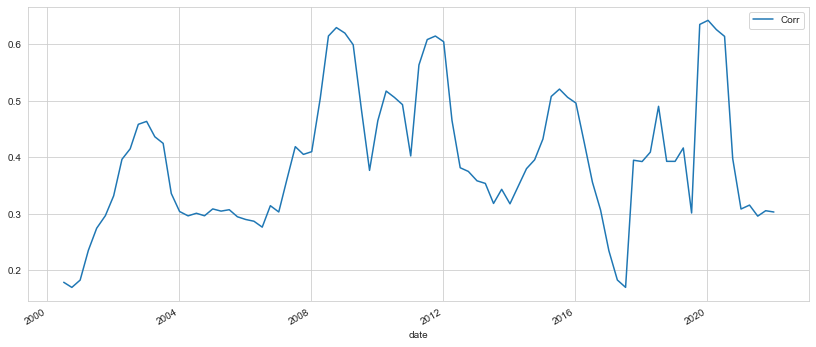

In [5]:
Max_T = LogReturn_df.shape[0]
N=int(Max_T / 63)

Correlation_array = {}
Date_middle_moving_Window = []
Average_Corr = []

for i in range(N-1):
    Correlation_array[i]=LogReturn_df.iloc[i*63:252+i*63].corr()
    Date_middle_moving_Window.append(LogReturn_df.iloc[i*63:252+i*63].index[126]) # pick the data of the middle of the window
    Average_Corr.append(Correlation_array[i].mean().mean())

    
date_MeanCorr = list(zip(Date_middle_moving_Window,Average_Corr))  
df_ave_Corr = pd.DataFrame(date_MeanCorr, columns=['date','Corr'])  
df_ave_Corr=df_ave_Corr.set_index('date')

df_ave_Corr.plot(figsize=(14,6))
plt.show()


### plot the heatmap of the correlation in two different time windows

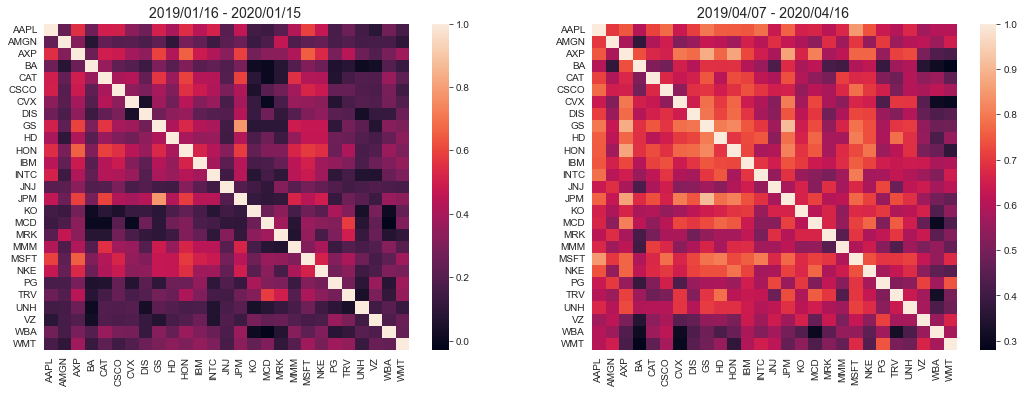

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.heatmap(Correlation_array[76],xticklabels=tickers, yticklabels=tickers,ax=axes[0])
axes[0].set_title("2019/01/16 - 2020/01/15 ", size=14)

sns.heatmap(Correlation_array[77],xticklabels=tickers, yticklabels=tickers,ax=axes[1])
axes[1].set_title("2019/04/07 - 2020/04/16 ", size=14)

plt.savefig('Correlation_heatmap_USA.pdf')
plt.show()
